# Project: Scanned Text Receipt Text Localization

## show img func

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

def show_img(img_path, w, h):
  plt.figure(figsize=(w,h))
  img = mpimg.imread(img_path)
  imgplot = plt.imshow(img)
  plt.show()

# Problem overview

## SROIE challenge task 1
**SROIE: Scanned Receipt OCR and Information Extraction**

`SROIE challenge:` [https://rrc.cvc.uab.es/?ch=13](https://rrc.cvc.uab.es/?ch=13)

- Scanned Receipt OCR là quá trình nhận diện văn bản từ các hóa đơn.
- Mặt khác, extracting key information từ các hóa đơn sau đó lưu lại thành text có cấu trúc có thể được sử dụng bởi nhiều ứng dụng, dịch vụ khác. 

$\Longrightarrow$ SROIE có vai trò quan trọng trong việc tự động hóa, số hóa tài liệu, văn bản,... đặc biệt trong lĩnh vực kinh doanh, kế toán, thuế,...

- Nhờ tốc độ xử lí phần cứng tăng, cũng như việc áp dụng các mạng học sâu đã giúp OCR có thể áp dụng được cho các tác vụ thực tế như: nhận diện chứng minh, thẻ tên, biển số xe, chữ viết tay, ...
- Tuy nhiên, OCR đối với hóa đơn lại yêu cầu độ chính xác cao hơn nhiều so với các tác vụ OCR cho ứng dụng khác. SROIE càng trở nên khó hơn khi hình ảnh scanned hóa đơn có chất lượng thấp. Vì vậy, các hệ thống SROIE hiện tại vẫn phụ thuộc lớn vào nguồn nhân lực. $\Longrightarrow$ Đó cũng là vấn đề dẫn tới cần phải nhanh chóng phát triển, thiết kế hệ thống SROIE hiệu quả, tốc độ, giảm thiểu sự phụ thuộc nhân lực tối đa.

SROIE task 1: Scanned Text Receipt Text Localization:
`Bảng kết quả Task 1` [https://rrc.cvc.uab.es/?ch=13&com=evaluation&task=1](https://rrc.cvc.uab.es/?ch=13&com=evaluation&task=1)

Với hình ảnh đầu vào là các hóa đơn:
- Nhiệm vụ, output đầu ra: Xác định chính xác được 4 tọa độ của từng bounding box chứa text.
- Đánh giá: Ranking dựa trên $F_1$ score

Như vậy, để hệ thống SROIE hiệu quả, độ chính xác cao thì task 1 - Text localization - Nhận diện được các bounding box chứa text phải có độ chính xác cao, đây cũng là mục tiêu của bài báo cáo này.

#### Dữ liệu

`gdrive: `[https://drive.google.com/open?id=1ShItNWXyiY1tFDM5W02bceHuJjyeeJl2](https://drive.google.com/open?id=1ShItNWXyiY1tFDM5W02bceHuJjyeeJl2)

`baidu: `[https://pan.baidu.com/s/1a57eKCSq8SV8Njz8-jO4Ww#list/path=%2FSROIE2019&parentPath=%2F](https://pan.baidu.com/s/1a57eKCSq8SV8Njz8-jO4Ww#list/path=%2FSROIE2019&parentPath=%2F)


format dữ liêu: `x1, y1, x2, y2, x3, y3, x4, y4, annotation`

### Ngôn ngữ, thư viện

Python 3.6

numpy==1.18.5

pyclipper

colorlog

Polygon3

opencv-python 

torch

torchvision

tensorboard

matplotlib

scikit-image

tqdm

sklearn

## Object recognition

Object recognition là một thuật ngữ chung để mô tả một tập hợp các nhiệm vụ của computer vision có liên quan đến việc xác định các đối tượng trong ảnh kỹ thuật số.


### Image classification

Liên quan đến việc dự đoán nhãn của một đối tượng trong một ảnh:
- Input: Một hình ảnh với một đối tượng
- Output: Nhãn của đối tượng


### Object localization 

Là việc xác định vị trí của một hoặc nhiều đối tượng trong một ảnh và vẽ bounding box quanh vùng được nhận định là đối tượng.
- Input: Một hình ảnh có một hoặc nhiều đối tượng
- Output: Một hoặc nhiều bounding box được xác định bởi toạ độ cụ thể

### Objection detection

Là việc kết hợp giữa Object recognition và Object localization cho một hoặc nhiều đối tượng trong một hình.
- Input: Một hình ảnh có một hoặc nhiều đối tượng
- Output: Một hoặc nhiều bounding box và nhãn cho mỗi bounding box tương ứng

`Objection recognition thường được hiểu là Object detection.`

## Image segmentation

Là một task mở rộng khác của computer vision, image segmentation được phân loại:
- Sementic segmentation: Thực hiện segment với từng lớp đối tượng khác nhau, ví như: toàn bộ car là là một lớp, toàn bộ human là một lớp,...
- Instance segmentation: Thực hiện segment với từng đối tượng một trong một lớp, ví như có 3 người trong ảnh thì sẽ có 3 vùng segment khác nhau cho mỗi người. 

[Nguồn hình 1.png](https://towardsdatascience.com/understanding-semantic-segmentation-with-unet-6be4f42d4b47)

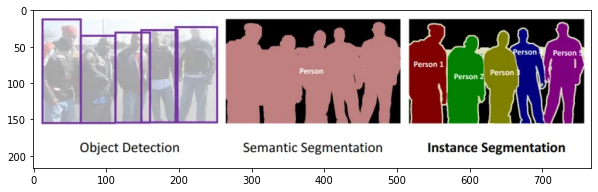

In [ ]:
show_img('1.png', 10, 10)

[Nguồn hình 2.png](https://machinelearningmastery.com/object-recognition-with-deep-learning/)

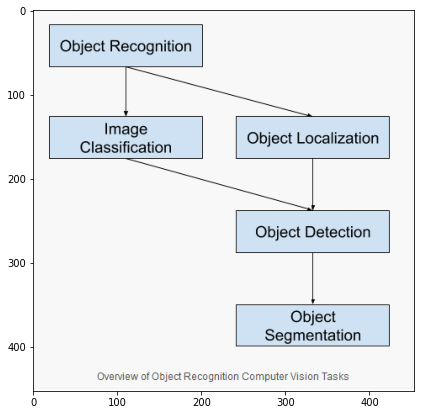

In [ ]:
show_img('2.png', 7, 7)

## Các metrics đánh giá

### Precision

Precision = $\frac{TP}{TP+FP}$

### Recall

Recall = $\frac{TP}{TP+FN}$

### IoU

- IoU - Intersection over Union hay còn gọi là Jaccard Index: là độ đo biểu diễn độ tương đồng giữa ground truth bounding box và predicted bounding box của mô hình. 

- IoU $\in [0,1]$, với 2 bounding boxes càng khớp nhau thì IoU càng gần 1, ngược lại càng gần 0

[Nguồn hình 3.png](https://www.google.com/url?sa=i&url=https%3A%2F%2Fwww.pyimagesearch.com%2F2016%2F11%2F07%2Fintersection-over-union-iou-for-object-detection%2F&psig=AOvVaw2UKawyrIhh1DWjKcg6p9dm&ust=1602034513359000&source=images&cd=vfe&ved=0CAIQjRxqFwoTCLif_eTpnuwCFQAAAAAdAAAAABAD)

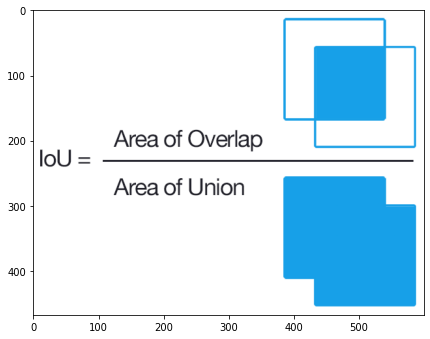

In [ ]:
show_img('3.png', 7, 7)

### mAP - mean Average Precision

`Tham khảo`

[link 1](https://viblo.asia/p/deep-learning-thuat-toan-faster-rcnn-voi-bai-toan-phat-hien-duong-luoi-bo-faster-rcnn-object-detection-algorithm-for-nine-dash-line-detection-bJzKmREOZ9N#_map-mean-average-precision-15)

[link 2](https://medium.com/@jonathan_hui/map-mean-average-precision-for-object-detection-45c121a31173)

[link 3](https://towardsdatascience.com/breaking-down-mean-average-precision-map-ae462f623a52)


- mAP - mean Average Precision: là metric được dùng phổ biến trong các bài toán về Information Retrieval và Object Detection. Tuy cùng tên gọi nhưng cách tính ở 2 dạng bài toán lại không giống nhau. 
  - [mAP cho bài toán Information Retrieval](https://www.kaggle.com/pestipeti/explanation-of-map5-scoring-metric)

### mAP cho bài toán Object Detection

  - Trước tiên cần định nghĩa TP, FP, FN, TN cho bài toán object detection cho bài toán với 1 nhãn
    - TP (True Positive): Là các predicted boxes với IoU lớn hơn hoặc bằng 1 giá trị threshold IoU cố định (0.5). Nếu như có nhiều predicted boxes trùng lặp với ground truth bounding box thì predicted box nào có IoU lớn nhất được coi là TP, còn lại là FP.
    - FP (False Positive): Là các predicted box với IoU nhỏ hơn threshold (0.5)
    - FN (False Negative): Mô hình không xác định được đối tượng trong ảnh (ứng với ground truth tương ứng)
    - TN (True Negative): Là những phần của ảnh không chứa đối tượng và thực tế thì đúng là như vậy.

##### Precision 

Là thông số thể hiện tỉ lệ các dự đoán là đúng (so với ground truth) so với tổng số các dự đoán của model

  Precision = $\frac{\text{true object detection}}{\text{all detected boxes}}$

#### Recall

Tỉ lệ dự đoán đúng trên tổng số ground truth

  Recall = $\frac{\text{true object detection}}{\text{all ground truth boxes}}$

#### Kết luận tổng quan với 1 nhãn

- Precision = 0.8 tức việc khi 1 đối tượng được phát hiện thì khả năng 80% đối tượng đó được phát hiện là chính xác
- Recall = 0.6 tức việc mô hình dự đoán đúng được 60% đối tượng so với toàn bộ ground truth bounding box ban đầu
- Precision thấp, Recall cao ứng với việc đa số các đối tượng đều được phát hiện nhưng rất nhiều trong số đó được dự đoán lệch khá nhiều so với ground truth bounding boxes, tức diện tích trùng lặp IoU thấp (nhiều False Positive)
- Precision cao, Recall thấp ứng với việc khá nhiều predicted boxes được dự đoán khá chuẩn xác, khớp với ground truth bounding boxes, tức diện tích trùng lặp cao. Tuy nhiên, mô hình lại không bắt được nhiều đối tượng, bị bỏ sót nhiều ground truth bounding boxes khác (nhiều False Negative)

#### Ví dụ cụ thể tính mAP

##### Tính Precision, Recall

Tính 2 giá trị precision và recall với ảnh bên dưới:

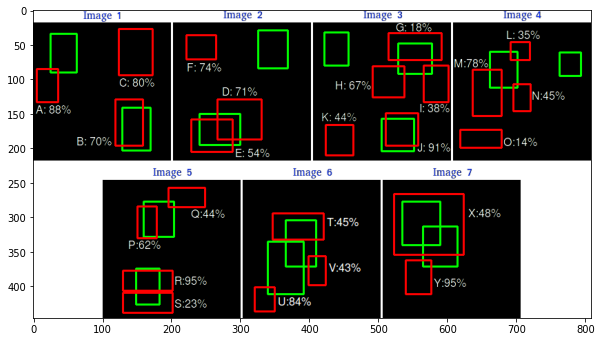

In [ ]:
show_img('4.png', 10, 10)

`Như trên hình với 7 bức ảnh, 15 ground truth bounding box (màu xanh lá) và 24 predicted bounding box (màu đỏ). Các con số cạnh các chữ cái (A-Z) biểu thị confidence score output của mô hình`

Việc đầu tiên cần làm là xác định tất cả các TP và FP trên tất cả các hình, ngưỡng IoU để xác định TP / FP được lấy = 0.3, hay diện tích trùng lặp giữa predicted bbox và ground truth bbox >= 0.3 thì được coi là TP, ngược lại là FP. Ta có bảng thống kê như bên dưới:

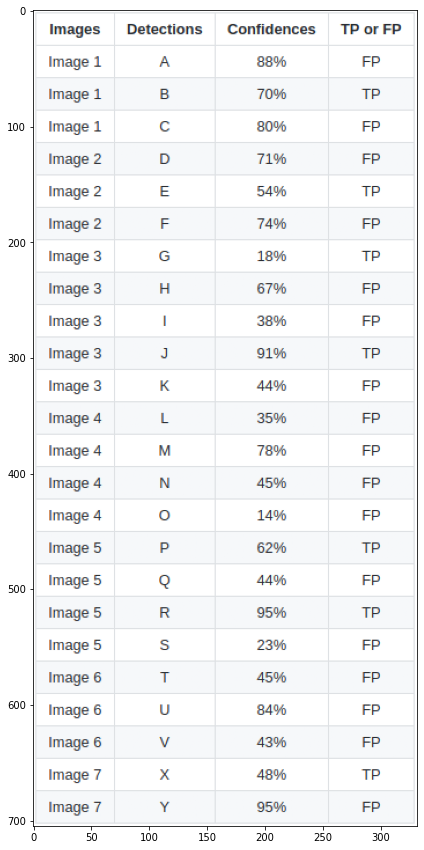

In [ ]:
show_img('5.png', 15, 15)

##### Precision / Recall với confidence score - PR-curve

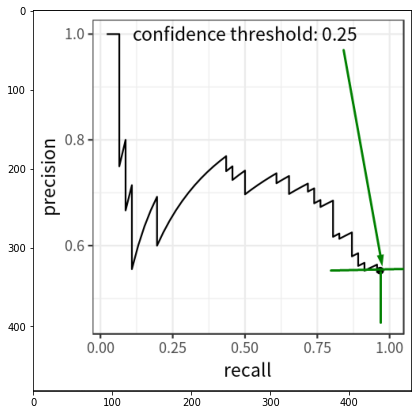

In [ ]:
show_img('6.png', 7, 7)

- PR-curve thể hiện mối liên hệ giữa 2 giá trị Precision và Recall khi điều chỉnh ngưỡng confidence score. Ta quy định thêm 2 thông số là AccTP và AccFP, lần lượt là TP tích lũy và FP tích lũy, sẽ được cộng dồn từ TP / FP với bảng giá trị đã được `sắp xếp theo confidence score giảm dần` như hình bên dưới

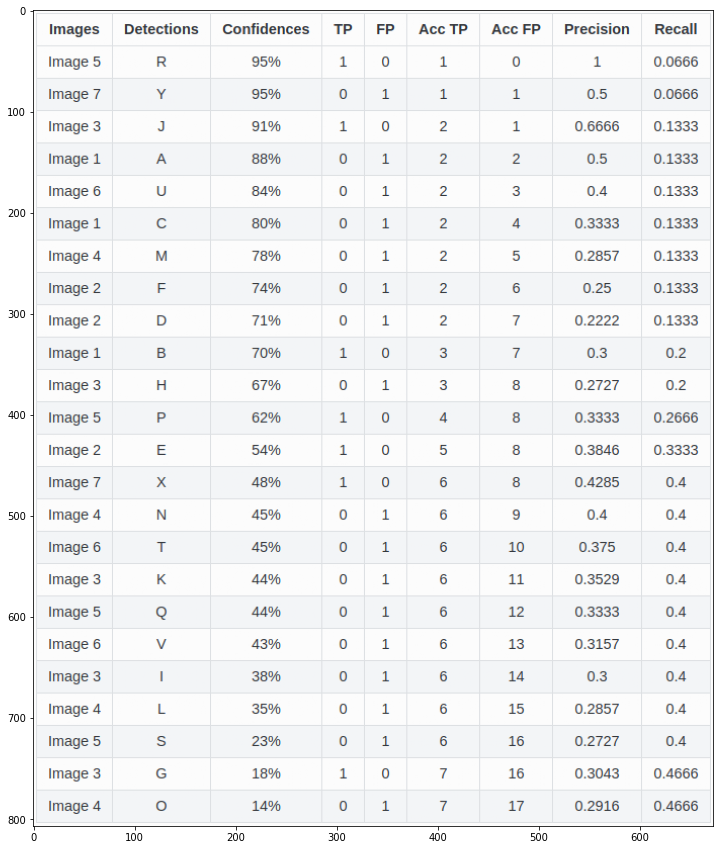

In [ ]:
show_img('7.png', 15, 15)

**Chi tiết tính toán**

- Dòng 1 - image5 - predicted box R - confidence score = 0.95
  - R có IoU cao hơn so với S nên R là TP, AccTP = 1, AccFP = 0
  - Precision = 1 / (1 + 0) = 1
  - Recall = 1 / (all ground truths) = 1 / 15 = 0.0666

- Dòng 2 - image7 - predicted box Y - conf score = 0.95
  - Y có conf score cao nhưng IoU thấp < 0.3 nên Y là FP, AccTP vẫn = 1, AccFP = 1
  - Precision = 1 / (1 + 1) = 0.5
  - Recall = 1 / (all gts) = 1 / 15 = 0.0666

- Dòng 3 - image3 - predicted box J - conf score = 0.91
  - J có IoU > 0.3 nên J là TP. Chú ý, vì là tích lũy nên AccTP = 1 + 1 = 2, AccFP = 1
  - Precision = 2 / (2 + 1) = 2 / 3 = 0.666
  - Recall = 2 / (all gts) = 2 / 15 = 0.1333

- Dòng 4 - image1 - predicted box A - conf score = 0.88
  - A có IoU < 0.3 nên A là FP ==> AccTP = 2, AccFP = 1 + 1 = 2
  - Precision = 2 / (2 + 2) = 2 / 4 = 0.5
  - Recall = 2 / 15 = 0.1333

- Dòng 5 - image6 - predicted box U - conf score = 0.84
  - U có IoU < 0.3 nên U là FP ==> AccTP = 2, AccFP = 2 + 1 = 3
  - Precision = 2 / (2 + 3) = 2 / 5 = 0.4
  - Recall = 2 / 15 = 0.1333

...

- Dòng 9 - image 2 - predicted box D - conf score = 0.71
  - D có IoU > 0.3, tuy nhiên E lại có IoU lớn nhất so với gt box lân cận (gt box màu xanh ở dưới bên trái của hình 2) nên E là TP, còn D là FP ==> AccTP = 2, AccFP = 6 + 1 = 7
  - Precision = 2 / (2 + 7) = 2 / 9 = 0.2222
  - Recall = 2 / 15 = 0.1333  

- Dòng 23 - image 3 - predicted box G - conf score = 0.18
  - G có IoU > 0.3 và cũng là lớn nhất trong 3 predicted box (G, H, I) với gt box màu xanh trên cùng bên phải của hình 3 ==> G là TP ==> AccTP = 6 + 1 = 7, AccFP = 16
  - Precision = 7 / (7 + 16) = 7 / 23 = 0.3043
  - Recall = 7 / 15 = 0.46666

- Dòng 24
  - O có IoU = 0 < 0.3 nên O là FP ==> AccTP = 7, AccFP = 16 + 1 = 17
  - Precision = 7 / (7 + 17) = 7 / 24 = 0.2917
  - Recall = 7 / 15 = 0.46666

Sau khi tính toán giá trị Precision, Recall cho các predicted boxes, thu được kết quả PR-curve:

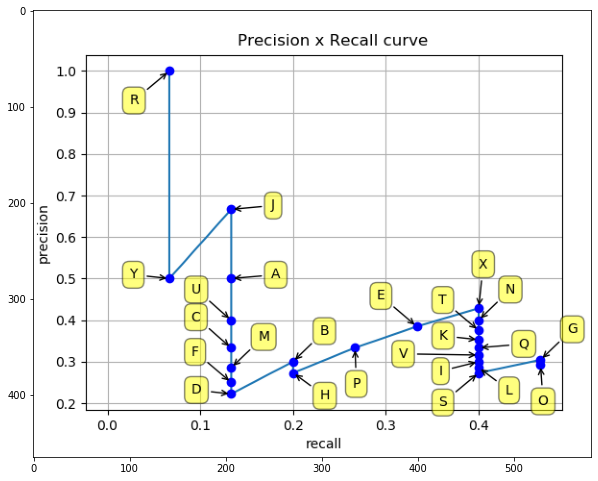

In [ ]:
show_img('8.png', 10, 10)

##### AP - Average Precision

Nhận thấy, việc giảm confidence score, Recall tăng dần, Precision thì lúc xuống lúc lên nhưng nhìn chung là có xu hướng giảm khi confidence score giảm. `AP (Average Precision)` là thông số trung bình precision ứng với các mốc recall tương ứng, trong đoạn [0, 1].

Có 2 cách tính toán là 11-points-interpolated và all-points-interpolated

###### 11 points interpolated

Với cách tính này, recall sẽ được chia đều thành 11 giá trị từ 0 -> 1 {0, 0.1, 0.2, ..., 1}, theo công thức:

AP = $\frac{1}{11}\sum_{r\in\{0, 0.1, 0.2, ... 1\}}P_{interpolated}(r)$

Trong đó:

$P_{interpolated}(r) = \max_{r^{*}>r}(P(r^{*}))$


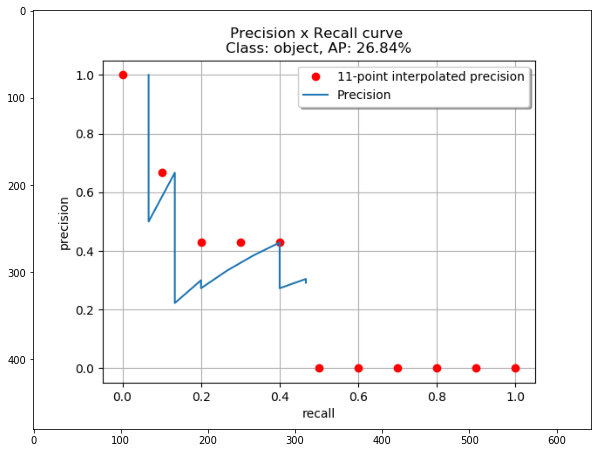

In [ ]:
show_img('9.png', 10, 10)

Vậy, theo công thức:

AP = $\frac{1}{11}(1+0.666+0.4285*3+0*6) = 26.84$

###### All points interpolated

Cách tính All-points-interpolated cũng gần tương tự, khác là lần này ta tính toán phần diện tích bao phủ dưới PR-curve, với công thức:

AP = $\sum(r_n - r_{n-1})P_{interpolated}(r_n)$

Với:

$P_{interpolated}(r) = \max_{r>r^{*}}(P(r^{*}))$

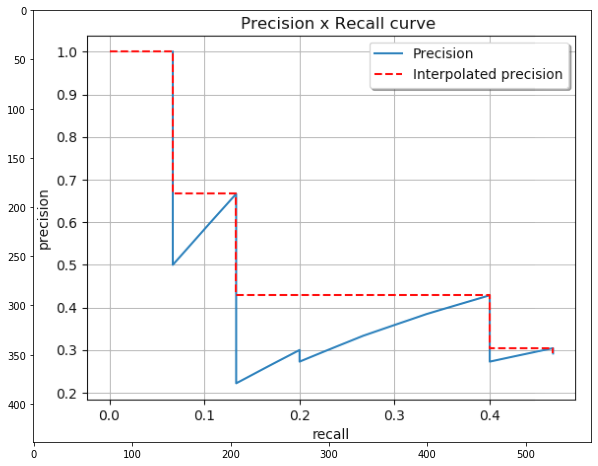

In [ ]:
show_img('10.png', 10, 10)

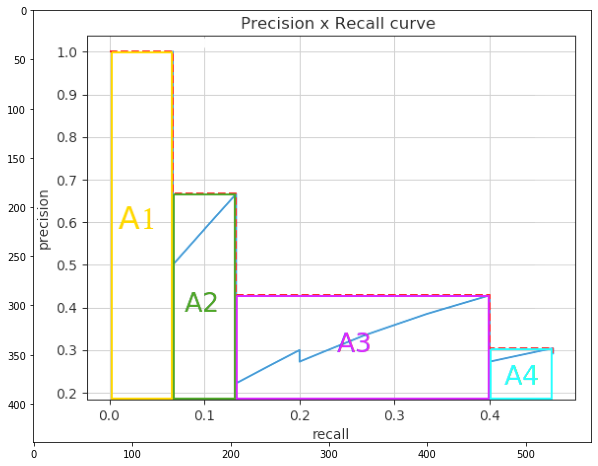

In [ ]:
show_img('11.png', 10, 10)

Vậy, theo công thức:

AP = A1 + A2 + A3 + A4

$\leftrightarrow$ AP = (0.0666−0)\*1 + (0.1333−0.0666)\*0.6666 + (0.4−0.1333)\*0.4285 + (0.4666−0.4)\*0.3043 = 24.56

##### mAP - mean Average Precision

mAP là trung bình AP score của n class, được định nghĩa với công thức:

mAP = $\frac{1}{N}\sum^{N}_{i=1}AP_i$

Như vậy, với mỗi threshold khác nhau cho việc phân định TP, FP thì ta sẽ có các giá trị AP tương ứng chỗ mỗi class, đồng nghĩa với việc sẽ có mAP riêng theo các threshold này.

### Hmean

hmean cho bài toán task 1 SROIE

$F_1 = 2\frac{Precision\times Recall}{Precision + Recall}$

---
# Mô hình PAN (Pixel Aggregation Network)

`paper:` [Efficient and Accurate Arbitrary-Shaped Text Detection with Pixel Aggregation Network](https://arxiv.org/abs/1908.05900)

`code:` [https://github.com/WenmuZhou/PAN.pytorch](https://github.com/WenmuZhou/PAN.pytorch)

---

Qua kết quả đánh giá thực nghiệm từ paper, PAN được nhóm tác giả đánh giá là mô hình hiệu quả, cân bằng giữa performance - speed trong real time, có thể nhận diện text instance có dạng curve.

## Pipeline

**PAN's pipeline gồm 2 bước**:
1. Dùng`Segmentation network` dự đoán:
  - Text regions
  - Kernels
  - Similarity vectors
2. Dùng `predicted kernels` xây dựng lại hoàn chỉnh(rebuilding complete) text instances.

Hình 1. Tổng quan pipeline mô hình PAN - [Efficient and Accurate Arbitrary-Shaped Text Detection with Pixel Aggregation Network](https://arxiv.org/abs/1908.05900)

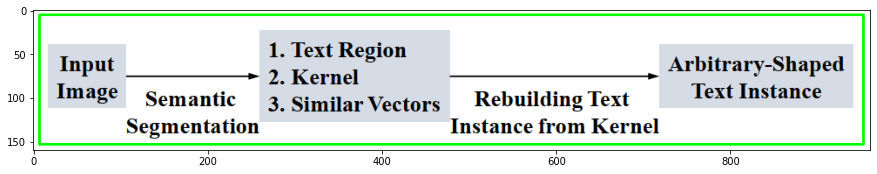

In [ ]:
show_img('12.png', 15, 15)

## Kiến trúc

**PAN's architecture gồm 2 phần**:

1. Low computational-cost `segmentation head`:
  - Feature Pyramid Enhancement Module (`FPEM`)
  - Feature Fusion Module (`FFM`)
2. `Learnable post-processing`:
  - Pixel Aggregation

Hình 2. Tổng quan kiến trúc mô hình PAN - [Efficient and Accurate Arbitrary-Shaped Text Detection with Pixel Aggregation Network](https://arxiv.org/abs/1908.05900)


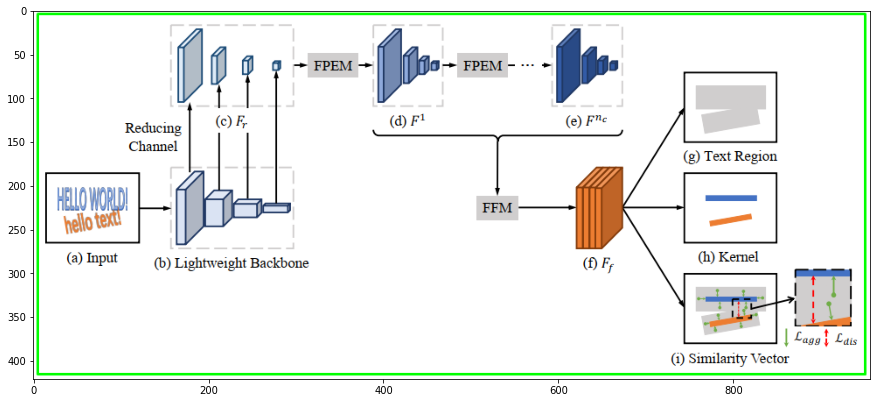

In [ ]:
show_img('13.png', 15, 15)

- Nhằm tăng tính efficiency, light weight backbone được dùng: ResNet18 (pretrained). Từ conv2, conv3, conv4, conv5 của backbone tiến hành generate ra 4 feature maps, convolution kernel size 1x1 để giảm output channels còn 128, kết quả thu được các $F_r$ tương ứng.

[CODE](https://github.com/WenmuZhou/PAN.pytorch/blob/1c735dd73eb7fb44b83a9cdbaf4b467ed6445ea3/models/modules/segmentation_head.py#L75)

- Nhưng mặt khắc, lightweight thể hiện dữ liệu không quả, để khắc phục hạn chế này, PAN thêm phần low-computational cost `head segmentation` với 2 modules: `FPEM` và `FFM`. FPEM được kết nối ngay sau lightweight backbone, bên cạnh đó, FPEM có thể xếp tầng chồng lên nhau từ $F^{1}$ đến $F^{n_c}$. Ngay sau `FPEM`, `FFM` có nhiệm vụ tổng hợp các `FPEM` từ $F^{1}$ đến $F^{nc}$ thành một feature map $F_f$ với stride = 4, channel number = 512. $F_f$ được dùng để dự đoán `text regions`, `kernels`, `similarity vectors`.

- Cuối cùng, PAN sử dụng post processing `Pixel Aggregation` (PA) để xây dựng lại text instances.

### Segmentation head: FPEM

Hình 3.Chi tiết FPEM - [Efficient and Accurate Arbitrary-Shaped Text Detection with Pixel Aggregation Network](https://arxiv.org/abs/1908.05900)

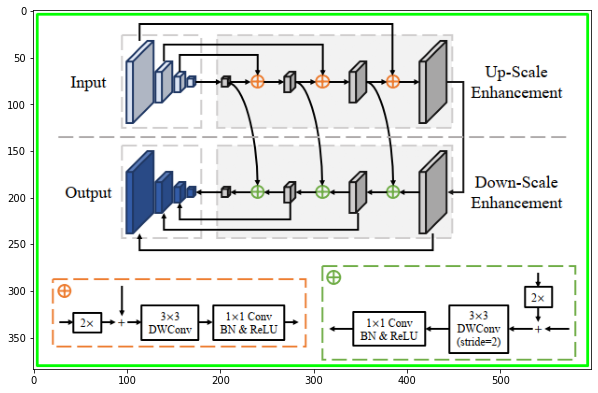

In [ ]:
show_img('14.png', 10, 10)

[FPEM code](https://github.com/WenmuZhou/PAN.pytorch/blob/1c735dd73eb7fb44b83a9cdbaf4b467ed6445ea3/models/modules/segmentation_head.py#L129). `FPEM` có 2 pha chính: 
- Up-Scale Enhancement: Đầu vào là các feature maps được generated từ backbone
- Down-Scale Enhancement: Đầu ra của pha này là output của `FPEM`

Các phép tính:
- "+": element-wise addition
- "2×": 2× linear upsampling
- "DWConv": depthwise convolution
- "Conv": regular convolution
- "BN": Batch Normalization






### Segmentation head: FFM

Hình 4.Chi tiết FFM - [Efficient and Accurate Arbitrary-Shaped Text Detection with Pixel Aggregation Network](https://arxiv.org/abs/1908.05900)</center>

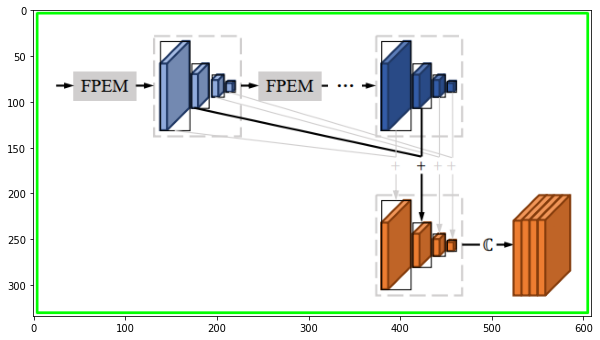

In [ ]:
show_img('15.png', 10, 10)

[FFM code](https://github.com/WenmuZhou/PAN.pytorch/blob/1c735dd73eb7fb44b83a9cdbaf4b467ed6445ea3/models/modules/segmentation_head.py#L95). `FFM` có nhiệm vụ là tổng hợp lại các $F^{n_c}$ tương ứng với độ sâu của `FPEM`.
- Vì low level và high level trong `FPEM` đều chứa thông tin cho việc thực hiện sementic segmentation, nhưng nếu lấy hết các conv2, conv3, conv4, conv5 (trong đó, mỗi conv có đầu ra là 128), mà tổng cộng sẽ có $F^{n_c}$ `FPEM` modules thì đầu ra là `4x128xnc` $\rightarrow$ làm việc chậm quá trình predict kết quả.

PAN thực hiện tổng hợp `FPEM` bằng cách element-wise addition trực tiếp với các conv. Thu được kết quả cuối cùng sau khi tổng hợp các `FPEM` ở các độ sâu, tiến hành upsampled và concatenated thành feature map cuối cùng tương ứng `4x128`.

- Các phép tính:
  - "+": element-wise addition
  - "C": upsampling, concatenating


### [Post-processing: Pixel Aggregation](https://github.com/WenmuZhou/PAN.pytorch/blob/517e9eec3eeb629a9f346f2a80599b0e01e653ff/post_processing/__init__.py#L20)

Hình 5. Text regions, Kernels, Similarity vectors - [Efficient and Accurate Arbitrary-Shaped Text Detection with Pixel Aggregation Network](https://arxiv.org/abs/1908.05900)</center>

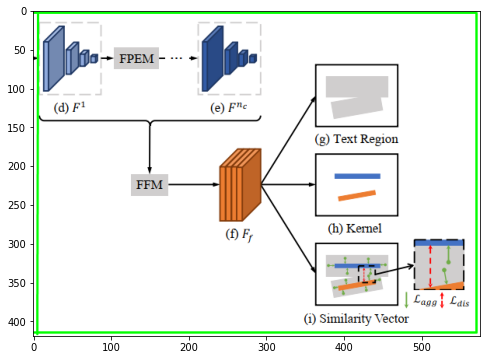

In [ ]:
show_img('16.png', 8, 8)

- Hình 5g, thấy rằng `Text regions` chứa toàn bộ shape của text instances. Nhưng các `Text regions` gần nhau thường bị overlap lẫn nhau.
- Ngược lại, hình 5h, thấy rằng `Kernel` giúp text instances được phân biệt tốt hơn. Nhưng Kernels lại không chứa toàn bộ text instances.
- Để rebuild lại hoàn chỉnh text instances, cần phải merge pixels trong `Text regions` với `Kernels` $\rightarrow$ `Pixel Aggregation` (PA).
- `PA` lấy ý tưởng từ việc clustering, từ `Kernels` tiến hành reconstruct lại hoàn chỉnh text instances. Vậy ở đây, `text instances` được hiểu như là các clusters, `Kernels` được xem là các cluster centers, `text pixels` là dữ liệu samples cho việc clustering.
- Cụ thể PA, với đầu vào 1 image, sau khi đi qua mô hình PAN thì predict output = (6,H,W), với threshold = 0.7311:
  - text = pred[0] > threshold 
  - kernel = (pred[1] > threshold) * text
  - similarity_vectors = pred[2:]

  $\rightarrow$ Với kernel thu được từ kết quả của segmentation head:
  1. Tìm các [connected components](https://www.youtube.com/watch?v=hMIrQdX4BkE)(connectivity = [4-way](https://stackoverflow.com/questions/46441893/connected-component-labeling-in-python)). Mỗi connected component được coi như một kernel riêng biệt của mỗi text instance.
    - Loại các connected component có số points < 5
    - Dùng 
  2. Với mỗi kernel riêng biệt như vậy, áp dùng tìm kiếm theo chiều rộng (breadth first search) để merge các text pixels liền kề trong các text regions (4-way) với điều kiện threshold distance < 0.8 từ kernel text instances tới các pixels, điều kiện là các text pixels này chưa được gán label cho kernel khác tại thời điểm xét.
  3. Lặp lại bước 2 cho tới khi không còn text pixel nào thỏa điều kiện threshold distance

#### Loss aggregation

$\Longrightarrow$ Để xác định text pixels vào đúng kernels thì khoảng cách giữa text pixel và kernel trong cùng một text instance phải nhỏ. Tại pha training, PAN dùng aggregation loss $L_{agg}$ để thể hiện ràng buộc này:

**Loss aggregation**: $ \mathcal{L}_{agg} = \frac{1}{N}\sum^{N}_{i=1}\frac{1}{|T_i|} \sum_{p \in T_i} \ln(\mathcal{D}(p, K_i)+1)$ `(1)`.
- Trong đó:

  - ${\mathcal{D}(p, K_i)=\max(\Vert\mathcal{F}_{(p)}-\mathcal{G}(K_i)\Vert - \delta_{agg}, 0)}^{2}$
    - Với:
        - N: số lượng text instances ~ số lượng clusters
        - $T_i$: text instance thứ $i^{th}$
        - $\mathcal{D(p, K_i)}$: khoảng cách giữa text pixel p với kernel $K_i$ của text instance $T_i$
        - $\delta_{agg}$: constant = 0.5 (used by PAN), nhằm filter easy samples ~ filter các easy text pixels
        - $\mathcal{F}_{(p)}$: similar vector của pixel p
        - $\mathcal{G}(\cdot)$: similar vector của kernel $K_i$.
          - $\mathcal{G}(\cdot)=\sum_{q\in K_i}\frac{\mathcal{F}_{(q)}}{\vert K_i \vert}$

#### Loss discriminate

$\Longrightarrow$ Ngoài ra, giữa các cluster centers ~ kernels của các text instances cần giữ được khoảng cách phân biệt với nhau. PAN dùng discrimination loss $\mathcal{L}_{dis}$ để thể hiện ràng buộc này:

**Loss discriminate**: $ \mathcal{L}_{dis} = \frac{1}{N(N-1)} \sum^{N}_{i=1} \sum^{N}_{j=1,j \neq i} \ln(\mathcal{D}(K_i, K_j)+1)$ `(3)`
  - Trong đó:
    - $\mathcal{D}(K_i, K_j) = \max(\delta_{dis}-\Vert \mathcal{G}(K_i)-\mathcal{G}(K_j)\Vert, 0)^{2}$ `(4)`

$\rightarrow \mathcal{L}_{dis}$ có nhiệm vụ giữ khoảng cách giữa các kernels không nhỏ hơn $\delta_{dis}$ = 3 (used by PAN)

**Tại pha testing**: PAN dùng kết quả predicted similar vectors, nhằm arrange các pixels trong vùng text về kernel phù hợp. Các bước post processing:
1. Kết quả các predicted kernels từ pha segmentation head, tìm các connected components. Mỗi connected component được xem là một single kernel.
2. Với mỗi kernel $K_i$, merge có điều kiện các text pixels trong vùng predicted text với khoảng cách `Eculidean` của các similar vectors nhỏ hơn `d`.
3. Lặp lại bước 2 cho tới khi không còn text pixel nào thỏa điều kiện.

## Hàm loss

#### Định nghĩa hàm Loss

$\Longrightarrow$ PAN định nghĩa hàm Loss:

$\mathcal{L}=\mathcal{L}_{text} + \alpha \mathcal{L}_{ker} + \beta (\mathcal{L}_{agg} + \mathcal{L}_{dis})$ `(5)`

- $\mathcal{L}_{text}$: loss của text regions
- $\mathcal{L}_{ker}$: loss của kernels
- $\alpha, \beta$: cân bằng độ quan trọng giữa $\mathcal{L}_{text}, \mathcal{L}_{ker}, \mathcal{L}_{agg}, \mathcal{L}_{dis}$. PAN dùng $\alpha=0.5, \beta=0.25$.

#### Hàm Loss text


$\mathcal{L}_{text}=1-\frac{2\sum_i P_{text}(i)G_{text}(i)}{\sum_i P_{text}(i)^{2}+\sum_i G_{text}(i)^{2}}$ `(6)`

#### Hàm Loss kernel

$\mathcal{L}_{ker}=1-\frac{2\sum_i P_{ker}(i)G_{ker}(i)}{\sum_i P_{ker}(i)^{2}+\sum_i G_{ker}(i)^{2}}$ `(7)`

Trong đó:
- $P_{text}(i)$: tương ứng giá trị kết quả từ segmentation của pixel thứ $i^{th}$, `tương ứng với vùng text regions`
- $G_{text}(i)$: tương ứng giá trị ground truth của pixel thứ $i^{th}$, `tương ứng với vùng text regions`
- Tương tự với $P_{ker}(i)$ và $G_{ker}(i)$.

## Evaluate mô hình PAN

### Constraints:
  - IOU_CONSTRAINT: 0.5
  - AREA_PRECISION_CONSTRAINT: 0.5

### Chi tiết:

- Load files bouding boxes dự đoán và ground truth. Trong mỗi file name tương ứng, với từng dòng (từng bounding box):
  - Lấy 8 index đầu tương ứng x1, y1, x2, y2, x3, y3, x4, y4. Kiểm tra, sắp xếp theo chiều kim đồng hồ bắt đầu từ top left.
  - Lấy polygon tương ứng từ 8 điểm tọa độ, lưu vào gtPols, detPols tương ứng
  - Khởi tạo matrix với mxn tương ứng số bounding boxes ground truth file và predicted file, phục vụ cho việc tính giá trị IoU giữa các bounding boxes của 2 files
    - Các bounding box ở file ground truth có text = '###' $\rightarrow$ được marked, lưu vào gtDontCarePolsNum.
    - Với từng bounding box ở predicted files, tính giá trị IoU giữa bb này với từng bb trong gtDontCarePolsNum (nếu số lượng gtDontCarePolsNum > 0). Giá trị `precision = 0` nếu diện tích predicted predicted bb (`pdDimensions`) = 0, ngược lại <br> `precision = IoU/pdDimensions`, nếu giá trị `precision` > `AREA_PRECISION_CONSTRAINT`, predicted bb này được marked, lưu vào detDontCarePolsNum, break vòng lặp, qua bbox tiếp của det file.
  - Lần lượt tính giá trị `intersection`, `union`, `intersection over union` giữa predicted polygon và ground truth polygon, lưu vào IoU matrix
  - Khởi tạo list zeroes: gtRectMat, detRectMat tương ứng chiều dài gtPols, detPols
  - Loop lần lượt qua các phần tử gtRectMat, detRectMat
    - Nếu cả 2 phần tử = 0 và cả 2 phần tử đều k tồn tại trong gtDontCarePolsNum, detDontCarePolsNum
      - Nếu giá trị tại IoU matrix tương ứng với 2 phần tử > `IOU_CONSTRAINT`:
        - Cho giá trị tại list `gtRectMat`, `detRectMat` tương ứng = 1
        - Giá trị tại `detMatched += 1`
  - Tính giá trị 
    - numGtCare = (len(gtPols) - len(gtDontCarePolsNum))
    - numDetCare = (len(detPols) - len(detDontCarePolsNum))

  - Vậy với từng file ta có kết quả:   
$\rightarrow$ Vậy, `nếu numGtCare = 0 thì recall = 1, precision = 0 nếu numDetCare > 0, ngược lại precision = 1`
  
Trường hợp còn lại:

$\rightarrow$ `recall = detMatched/numGtCare, precision = 0 nếu numberDetCare = 0, ngược lại precision = detMatched/numDetCare`

`hmean = 0 nếu Precision + Recall = 0. Ngược lại, hmean = 2 x Precision x Recall / (Precision + Recall)`
    
$\Longrightarrow$ Kết quả cuối cùng là cộng kết quả các file lại.


## Evaluate mô hình Task 1 (SROIE)

### Constraints

  - AREA_RECALL_CONSTRAINT: 0.8
  - AREA_PRECISION_CONSTRAINT: 0.4
  - EV_PARAM_IND_CENTER_DIFF_THR: 1
  - MTYPE_OO_O: 1
  - MTYPE_OM_O: 0.8
  - MTYPE_OM_M: 1



### Methods xác định giá trị recall, precision
  - one_to_one_match():
    - Đặt **cont = 0**
    - Xét giá trị recalMat(gt, det), tương ứng `1 gt xét với lần lượt tường cột det`, nếu thỏa cả 2:
      1. `recalMat(gt, det) >= AREA_RECALL_CONSTRAINT `
      2. `precisionMat(gt, det) >= AREA_PRECISION_CONSTRAINT`
      - `cont += 1`
    - Nếu `cont != 1`:
      - return `False`
    - Đặt lại **cont = 0**
    - Xét giá trị recalMat(gt, det), tương ứng 1 det xét với lần lượt tường dòng gt, nếu thỏa cả 2:
      1. `recalMat(gt, det) >= AREA_RECALL_CONSTRAINT `
      2. `precisionMat(gt, det) >= AREA_PRECISION_CONSTRAINT`
      - `cont += 1`
    - Nếu `cont != 1`:
      - return False
    - Nếu chỉ có 2 bb tại index đang xét thỏa >= AREA_RECALL_CONSTRAINT, >= AREA_PRECISION_CONSTRAINT
      - return True


  - num_overlaps_gt()
  - num_overlaps_det()
  - is_single_overlap()
  - one_to_many_match()
  - many_to_one_match()

### Chi tiết

- Load gt files, mỗi gt file:
  - Tạo `gtRects`: chứa tọa độ x, y của bbox dạng: x_min, y_min, x_max, y_max
  - Tạo `gtPolPoints`: chứa list points của bbox
  - Xét text tag = '###'?
    - True: thêm bbox vào `gtDontCareRectsNum`

  - Load det file cùng tên gt file:
    - Tạo `detRects`: chứa tọa độ x, y của bbox dạng: x_min, y_min, x_max, y_max
    - Tạo `detPolPoints`: chứa list points của bbox
    - Với từng bbox trong det file, nếu `len(gtDontCareRectsNum) > 0`
      - Tính IoU giữa bbox này và từng bbox trong `gtDontCareRectsNum`
        - Nếu diện tích bbox của det file = 0 (`rdDimensions`), thì `precision = 0`
        - Ngược lại `precision = IoU/rdDimensions`
        - Nếu `precision > AREA_PRECISION_CONSTRAINT`, mark bbox của det file vào `detDontCareRectsNum`
        - break vòng lặp, qua bbox tiếp của det file
    - Nếu số lượng gtRects = 0, thì recall = 1, precision = 0 nếu số lượng detRects > 0, ngược lại precision = 1
    - Nếu số detRects > 0:
      - Khởi tạo:
        - `outputShape` =[len(gtRects),len(detRects)]
        - `recallMat` = np.empty(outputShape)
        - `precisionMat` = np.empty(outputShape)
        - `gtRectMat` = np.zeros(len(gtRects))
        - `detRectMat` = np.zeros(len(detRects))
      - Với mỗi Rect trong gtRects: `# Tính recall, precision matrix`
        - Với mỗi Rect trong detRects:
          - Tính `Intersected` của 2 bb này
          - Tính diện tích mỗi bb: `rgDimensions`, `rdDimensions`
          - `recallMat` tương ứng index 2 bb = 0 nếu rgDimensions = 0, ngược lại = `Intersected/rgDimensions`
          - `precisionMat` tương ứng index 2 bb = 0 nếu rdDimensions = 0, ngược lại = `Intersected/rdDimensions`
      - Với từng gtRect trong gtRects: `# Tìm one-to-one matches`
        - Với từng detRect trong det Rects:
          - Nếu gtRectMat[gtNum] = 0 và detRectMat[detNum] = 0 và mỗi bb không có trong det/gt DontCareRectsNum
            - Tính match = one_to_one_match() # Chỉ có 2 bb này match với nhau khi xét recallMat, precisionMat
              - Nếu True: 
                - gtRectMat[gtNum] = 1
                - detRectMat[detNum] = 1
                - recallAccum += MTYPE_OO_O # 1
                - precisionAccum += MTYPE_OO_O # 1
            - Tính match = one_to_many_match()
              - Nếu True, không thỏa one_to_one_math:
                - recallAccum += MTYPE_OM_O # 0.8
                - precisionAccum += MTYPE_OM_O # 0.8
            - Tính match = many_to_one_match()
                - Tương tư, theo điều kiện cộng dồn các giá trị recall, precision

Kết quả cuối cùng precision, recall, hmean là cồng dồn kết quả các files.

## Sai khác thang đo

### PAN

PAN dùng IoU constraint = 0.5, với mỗi 2 bb tương ứng, xét điều kiện IoU, nếu thỏa: Tương ứng với việc tại 2 bb này có kết quả = 1, việc xét này tương tự True, False. Kết quả recall cuối cùng của mỗi file là số lượng các 2bb từng cặp thỏa điều kiện chia cho số lượng bb không có text tag (gt cho recall, det cho precision), Precision constraint phục vụ mục đích xác định các bb có text tag  '###'

### SROIE

- Mặt khác, SROIE:
  - Sử dụng trực tiếp kết quả:
    - Intersected/gtbox là giá trị recall cho 2 boxes tương ứng
    - Intersected/detbox là giá trị precision cho 2 boxes tương ứng
    - Dùng các giá trị precision, recall vừa tính được, xét các điều kiện one_matches_one, one-many, many-one, kết quả precision, recall cuối cùng chỉ được tính khi thỏa điều kiện: Recall >= 0.8, Precision >= 0.4, việc cộng kết quả tùy theo các trường hợp: 1, 0.8,
  - Cũng sử dụng Precision constraint phục vụ loại bỏ các bb có text tag '###'

## Kết luận

$\Longrightarrow$ SROIE có cách tính chặt chẽ hơn, dễ nhìn thấy là sẽ có trường hợp +0.8 thay vì +1 hết như PAN.

# Sử dụng mô hình PAN cho Task 1

`Training phase`

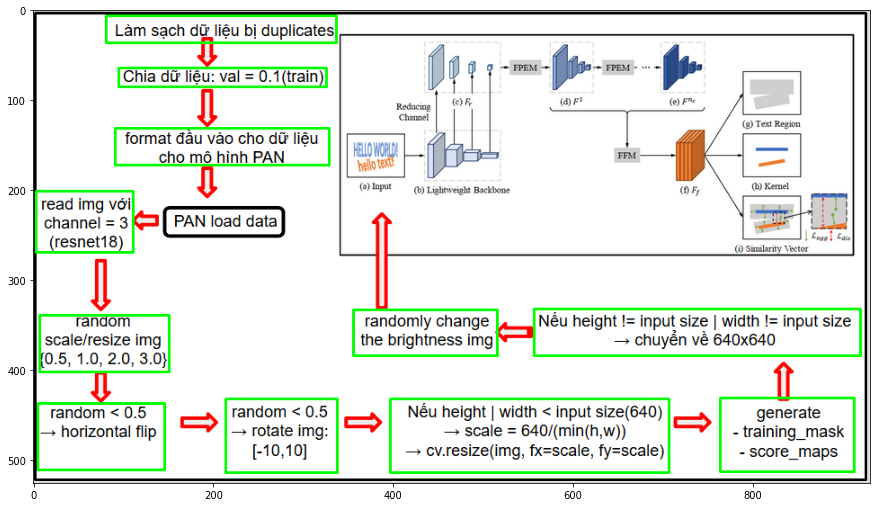

In [ ]:
show_img('17.png', 15, 15)

`Inference phase`

[post-processing](https://github.com/WenmuZhou/PAN.pytorch/blob/517e9eec3eeb629a9f346f2a80599b0e01e653ff/post_processing/__init__.py#L20)

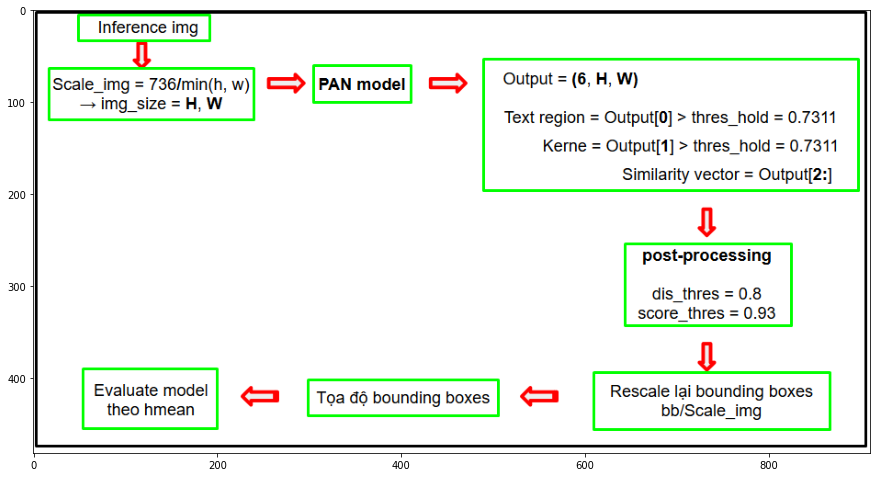

In [ ]:
show_img('18.png', 15, 15)

### Data reprocessing

#### Training data

##### Data cleaning

Xác định các unique images `*.jpg` và tương ứng file label `*.txt`. Kết quả thu được cho tập training là 626 samples, tập testing là 361 samples. Chia tập validation = 0.1 tập training, tương ứng 62 samples cho valdation,  564 samples cho training.

##### Format file đầu vào dữ liệu training: 

`path_to_img\tpath_to_gt`

- Denoising
- Smoothing

#### Inference missing data
 
Bộ dữ liệu test trên drive bị thiếu 1 sample, trên baidu đầy đủ.

#### Inference data: Crop lấy vùng ROI của img

`Ví dụ với img_name = X51005361898.jpg`

##### Bước 1. Lấy thresh img qua [gradient](https://opencv-python-tutroals.readthedocs.io/en/latest/py_tutorials/py_imgproc/py_gradients/py_gradients.html)

###### Original img

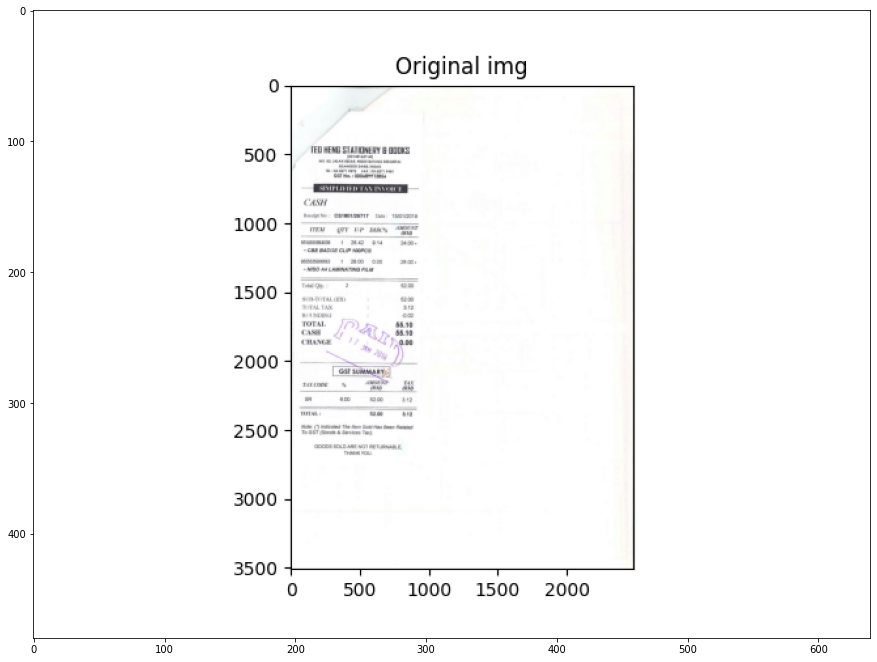

In [ ]:
show_img('19.png', 15, 15)

###### Gray scale

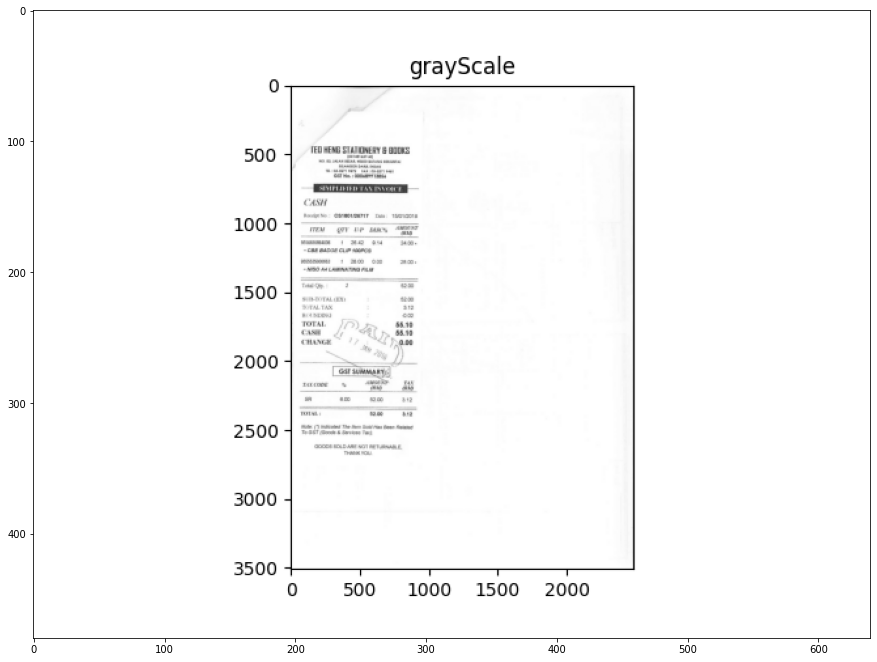

In [ ]:
show_img('20.png', 15, 15)

###### Blurred lần 1 từ gray img

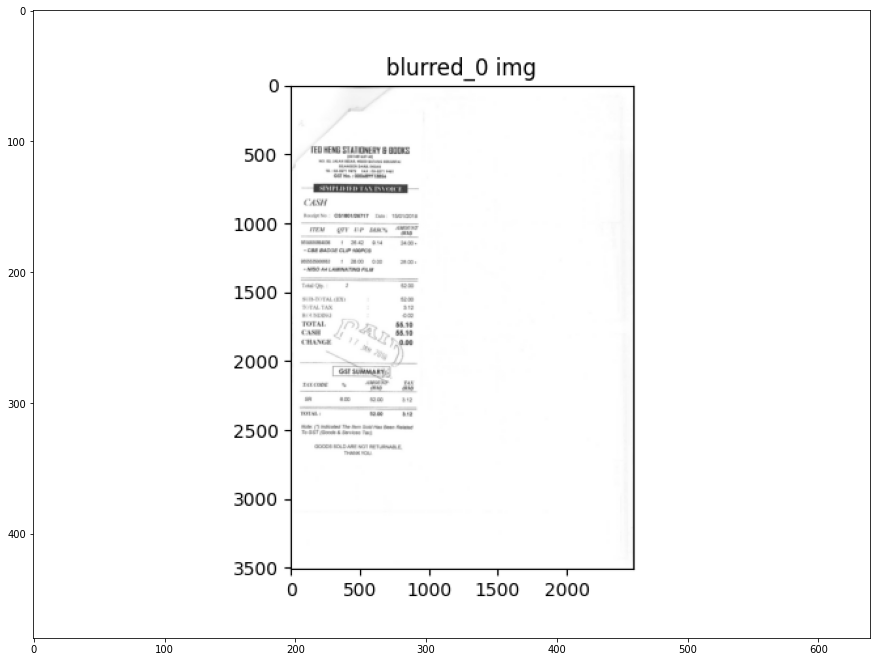

In [ ]:
show_img('21.png', 15, 15)

###### Lấy gradient trục hoành

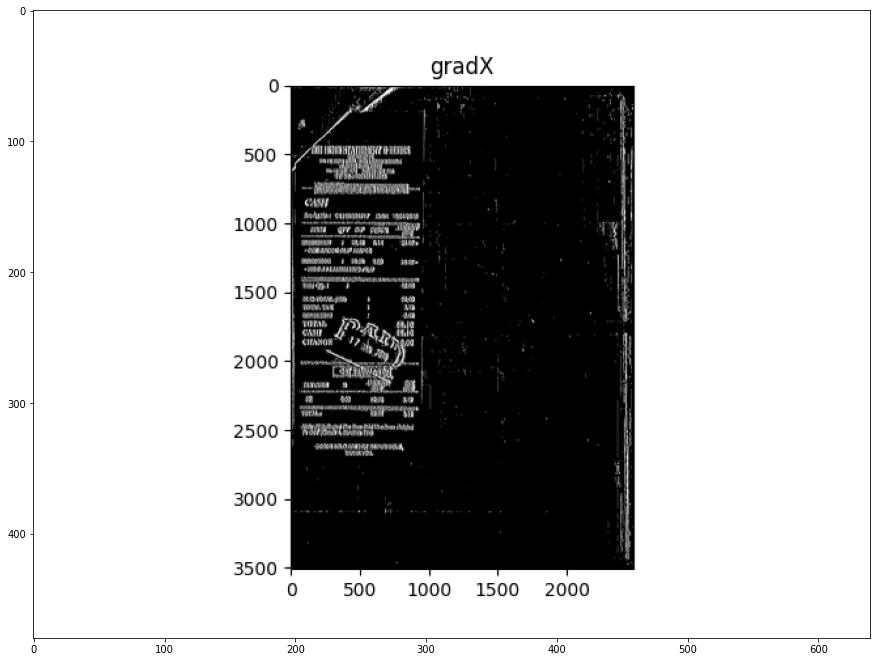

In [ ]:
show_img('22.png', 15, 15)

###### Lấy gradient trục tung

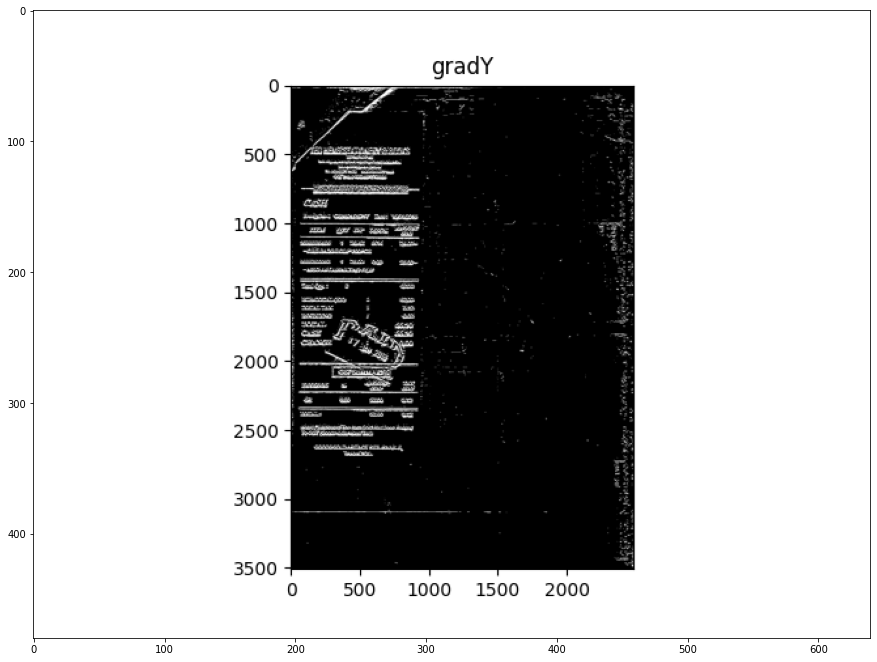

In [ ]:
show_img('23.png', 15, 15)

###### Lấy hiệu gradient 2 trục X, Y

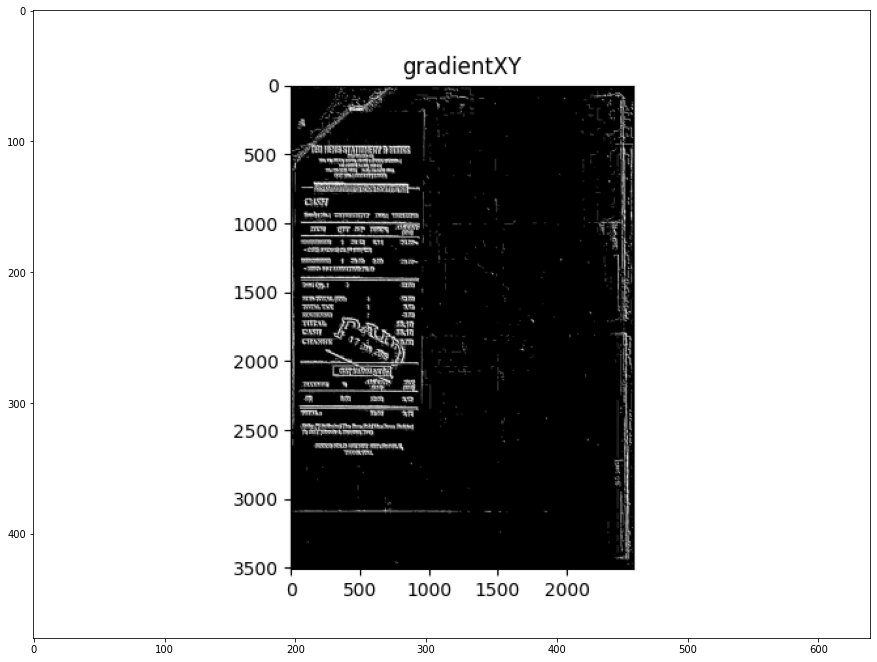

In [ ]:
show_img('24.png', 15, 15)

###### Lấy trị tuyệt đối hiệu gradient 2 trục X, Y

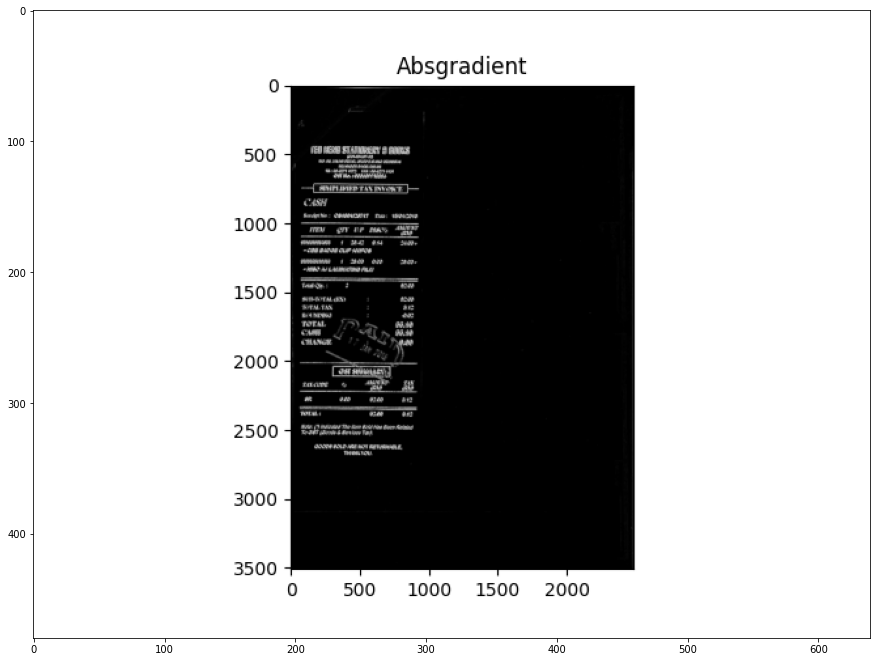

In [ ]:
show_img('25.png', 15, 15)

###### Blurred lần 2 từ kết quả trị tuyệt đối

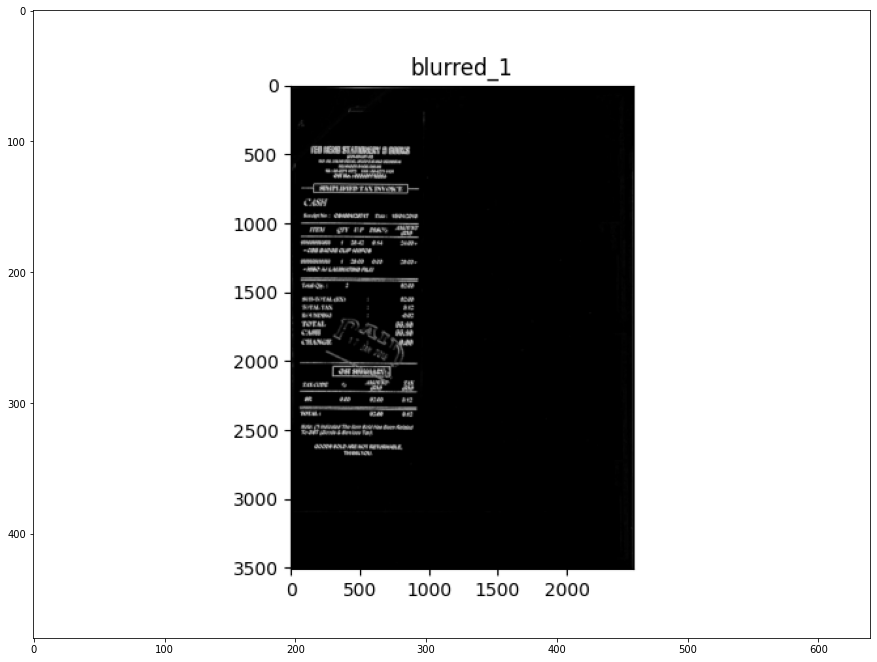

In [ ]:
show_img('26.png', 15, 15)

###### Lấy threshold kết quả blurred lần 2 với cv.THRESH_BINARY

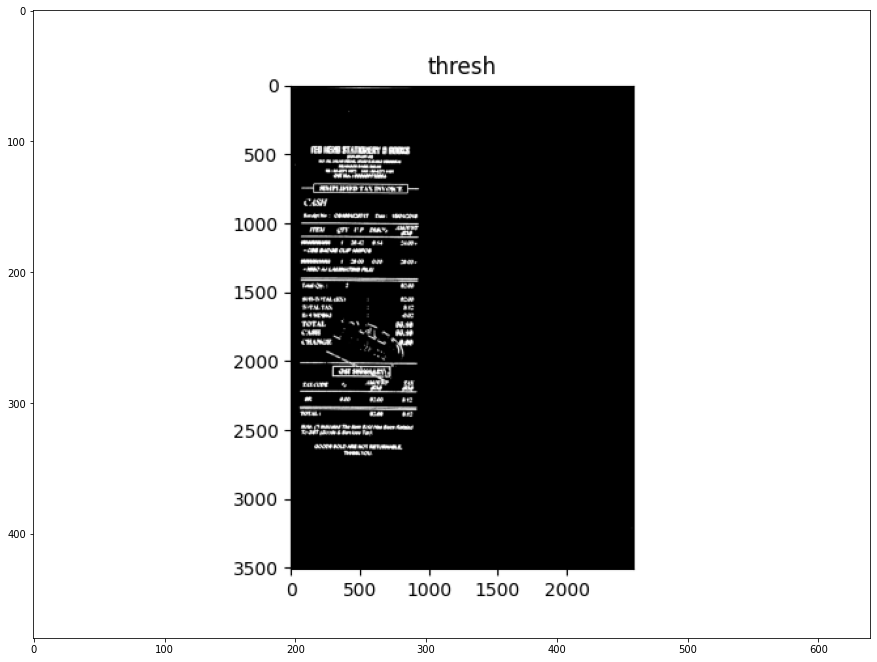

In [ ]:
show_img('27.png', 15, 15)

##### Bước 2. Lấy [morphological](https://opencv-python-tutroals.readthedocs.io/en/latest/py_tutorials/py_imgproc/py_morphological_ops/py_morphological_ops.html) hình dạng của thresh img từ bước 1

###### Kernel với hình dạng Ellipse từ cv2.MORPH_ELLIPSE

- Kernel được xác định qua cv2.getStructuringElement

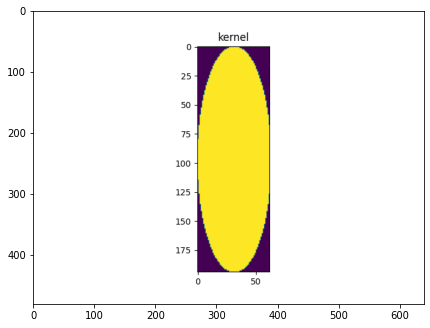

In [ ]:
show_img('28.png', 7, 7)

- Xác định morphological cho thresh img với:
  - kernel ellipese vừa được tạo
  - Dùng cv2.MORPH_CLOSE tương đương với cv2.dilate trước rồi cv2.erode sau

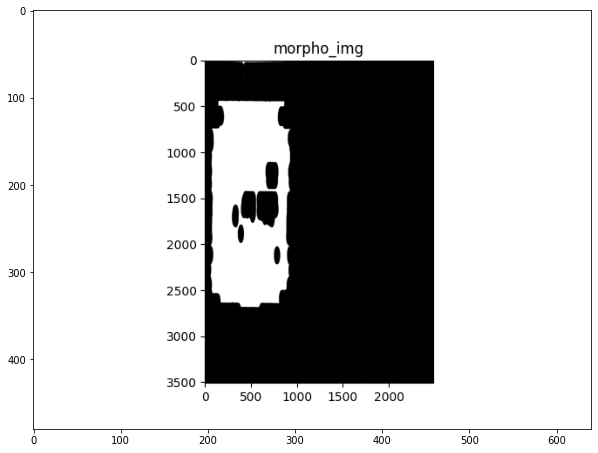

In [ ]:
show_img('29.png', 10, 10)

##### Bước 3. Tìm tất cả các [Contours](https://opencv-python-tutroals.readthedocs.io/en/latest/py_tutorials/py_imgproc/py_contours/py_contour_features/py_contour_features.html)

- Lấy contour có diện tích nhỏ nhất theo hình chữ nhật
- Crop theo tọa độ hình chữ nhật tìm được:
  - Y_max = max của các Y trong các tọa độ Y
  - Y_min = min của các Y trong các tọa độ Y
  - X_max = max của các X trong các tọa độ X
  - X_min = min của các X trong các tọa độ X
  - Crop hình với: [Y_min:Y_max, X_min:X_max]
- Adjust label các bouding boxes của text instances:
  - Lấy các tọa độ X và Y cũ, trừ đi X_min, Y_min tương ứng

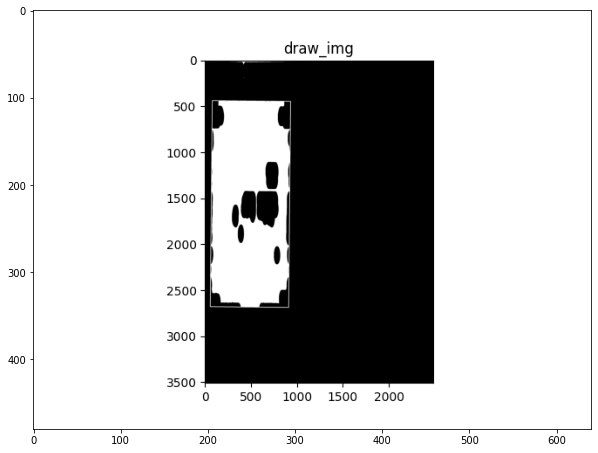

In [ ]:
show_img('30.png', 10, 10)

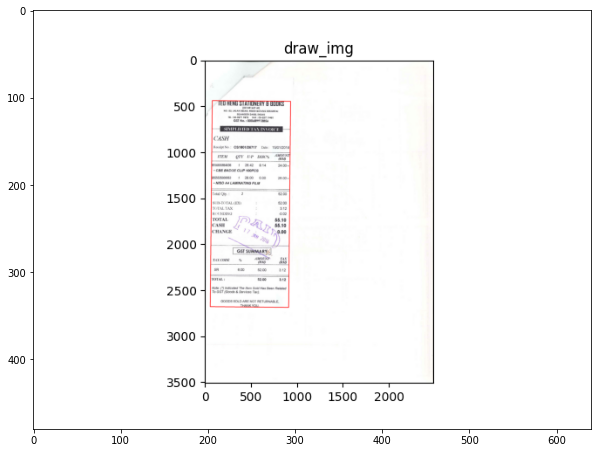

In [ ]:
show_img('31.png', 10, 10)

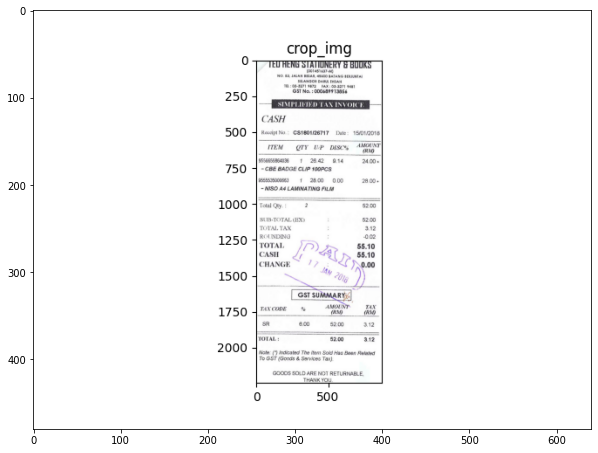

In [ ]:
show_img('32.png', 10, 10)

## Data augmentation
- horizontal flipping
- random scale/resize theo dx dy: 0.5, 1, 2.0, 3.0
- random rotate img: -10 degrees đến 10 degrees

## Thông số file config cho training phase

`hyperparams trong file config:`

### data_loader
- shrink_ratio: 0.5

[Giúp PAN tạo ra các grounth truth kernels](https://github.com/WenmuZhou/PAN.pytorch/blob/517e9eec3eeb629a9f346f2a80599b0e01e653ff/data_loader/data_utils.py#L56). Việc này lấy ý tưởng từ [PSENet](https://arxiv.org/pdf/1903.12473.pdf), 2 text instances gần nhau thường overlap nhau, dẫn tới false detection. PSENet tạo ra ra các kernels với scale khác nhau cho mỗi text instance.

### arch: PANModel
  - backbone: resnet18
  - FPEM repeat: 2
  - pretrained: True
  - segmentation head: FPEM_FFM

### loss: PANLoss
  - alpha: 0.5
  - beta: 0.25
  - delta_agg: 0.5 
  - delta_dis: 3 
  - ohem_ration: 3

#### [Online Hard Example Mining-OHEM](https://arxiv.org/abs/1604.03540) ratio

- Thông thường với việc huấn luyện mô hình object detector, mô hình tiến hành phân loại các vùng ảnh regions là object hay background. Tuy nhiên thực tế, bộ dữ liệu training thường có sự mất cân đối lớn giữa số lượng object và backgound $\rightarrow$ [PAN dùng OHEM](https://github.com/WenmuZhou/PAN.pytorch/blob/f790ad76489351a736b20ed2e2a87eb39c25321e/models/loss.py#L152) bỏ qua các vùng simple non-text khi tính giá trị $L_{text}$

- Mặt khác, sử dụng toàn bộ text pixels grouth truth khi tính $L_{ker}, L_{agg}, L_{dis}$

### optimizer:

- Adam
- lr: 1e-3
- weight decay: 0
- [amsgrad](https://arxiv.org/abs/1904.09237): True

[AMSGrad](https://paperswithcode.com/method/amsgrad) is a stochastic optimization method that seeks to fix a convergence issue with Adam based optimizers. `AMSGrad uses the maximum of past squared gradients rather than the exponential average to update the parameters`

#### Tổng quan một số thuật toán tối ưu

##### [Stochastic Gradient Descent (SGD)](https://www.d2l.ai/chapter_optimization/sgd.html#sec-sgd)

- SGD hiệu quả hơn Gradient Descent khi giải các bài toán tối ưu. Ví dụ: SGD ít chịu ít ảnh hưởng xấu gây ra bởi dữ liệu dư thừa
- Khi kích thước tập huấn luyện tăng, chi phí tính toán cho mỗi lần lặp của Gradient Descent cũng tăng theo, do đó SGD được ưa chuộng hơn trong trường hợp này

##### [Minibatch SGD](https://www.d2l.ai/chapter_optimization/minibatch-sgd.html#sec-minibatch-sgd)

- Minibatch SGD cho thấy việc mang lại hiệu quả đáng kể nhờ việc vector hóa, tức xử lý nhiều samples hơn trong một minibatch (việc này giúp xử lý dữ liệu song song trên nhiều GPU và nhiều máy tính một cách hiệu quả)
- Xử lý các batch thu được từ hoán vị ngẫu nhiên của dữ liệu huấn luyện (cụ thể, mỗi sample được xử lý chỉ một lần trong mỗi epoch theo thứ tự ngẫu nhiên)
- Nhìn chung thì SGD theo minibatch nhanh hơn SGD và Gradient Descent về thời gian hội tụ

##### [Phương pháp Momentum](https://www.d2l.ai/chapter_optimization/momentum.html#sec-momentum)

- Minibatch SGD giúp giảm phương sai nhờ việc lấy trung bình gradient trên minibatch. Một cách khác để đạt được việc này là thay việc tính toán gradient bằng một giá trị `leaky average`: $\mathbf{v}_t = \beta \mathbf{v}_{t-1} + \mathbf{g}_{t, t-1}$, với $\beta\in(0,1)$. Cách này thay thế gradient tức thời bằng một giá trị được lấy trung bình trên các gradient trước đó. Với $\mathbf{v}$ gọi là động lượng (momentum), $\mathbf{v}$ được coi như giá trị tích trữ gradients trong quá khứ

$\rightarrow$ Phương pháp Momentum bổ sung việc kết hợp giá trị gradient quá khứ, giúp quá trình hội tụ diễn ra nhanh hơn.

$\rightarrow$ Giúp tránh việc tối ưu bị ngưng trệ, điều mà nhiều khả năng xảy ra đối với hạ gradient ngẫu nhiên.

###### Momentum GD

[MLCB: Phần 4, chương 12, trang 167](https://github.com/tiepvupsu/ebookMLCB/blob/master/book_ML.pdf)


- Momentum giúp nghiệm vượt qua được cực tiểu địa phương, nhưng nghiệm lại dao động một khoảng thời gian nữa trước khi hội tụ:
  $\theta \leftarrow \theta - v_t = \theta - \eta\nabla_{\theta}J(\theta) - \gamma v_{t-1}$
  - Với 
    - $0<\gamma<1$ , giá trị thường chọn $\gamma = 0.9$
    - $v_{t-1}$ vận tốc tại thời điểm trước đó
    - $\nabla_{\theta}J(\theta)$: độ dốc tại điểm hiện tại

- Tuy nhiên với Momentum này thì nghiệm bị dao động một khoảng thời gian nữa trước khi hội tụ

$\rightarrow$ Nesterov accelerated gradient `(NAG)` giúp cho thuật toán Momentum GD hội tụ nhanh hơn.

Ý tưởng của NAG là dự đoán vị trí nghiệm trước một bước. Ví dụ, nếu sử dụng số hạng momentum $\gamma v_{t-1}$ để cập nhật vị trí của nghiệm thì nghiệm tiếp theo sẽ là $\theta - \gamma v_{t-1}$. Vậy thay vì sử dụng gradient tại điểm hiện tại, NAG dùng gradient tại điểm tiếp theo nếu sử dụng momentum: $\theta \leftarrow \theta - v_t = \theta - \eta\nabla_{\theta}J(\theta - \gamma v_{t-1}) - \gamma v_{t-1}$


##### [Adagrad](https://www.d2l.ai/chapter_optimization/adagrad.html#sec-adagrad)

`Vấn đề: Với việc huấn luyện mô hình trên đặc trưng thưa (sparse features), các tham số liên quan đến các đặc trưng thưa chỉ được cập nhật khi những đặc trưng này xuất hiện. Đối với tốc độ học giảm dần, ta có thể gặp phải trường hợp các tham số của những đặc trưng phổ biến hội tụ khá nhanh đến giá trị tối ưu, trong khi đối với các đặc trưng thưa, ta không có đủ số lượng dữ liệu thích đáng để xác định giá trị tối ưu của chúng. Nói một cách khác, tốc độ học hoặc là giảm quá chậm đối với các đặc trưng phổ biến hoặc là quá nhanh đối với các đặc trưng hiếm.`

- Coi learning rate cũng là một tham số cần điều chỉnh, liên tục giảm giá trị của tốc độ học theo từng toạ độ, cập nhật lớn với tọa độ giá trị gradient thường xuyên lớn, ngược lại cập nhật nhỏ.
- Adagrad thường hiệu quả đối với các đặc sparse features (learning rate giảm chậm hơn)
- Adagrad [cập nhật trọng số](https://www.d2l.ai/chapter_loptimization/adagrad.html#the-algorithm) như sau:


\begin{split}\begin{aligned}
    \mathbf{g}_t & = \partial_{\mathbf{w}} l(y_t, f(\mathbf{x}_t, \mathbf{w})) \\
    \mathbf{s}_t & = \mathbf{s}_{t-1} + \mathbf{g}_t^2 \\
    \mathbf{w}_t & = \mathbf{w}_{t-1} - \frac{\eta}{\sqrt{\mathbf{s}_t + \epsilon}} \cdot \mathbf{g}_t
\end{aligned}\end{split}

Với: 
- $\epsilon$: Hệ số tránh chia cho 0
- $s_t$: Tổng tích lũy tổng bình phương $g_t$ (phương sai của các gradient trong quá khứ)

$\rightarrow$ Giúp tránh việc điều chỉnh learning rate thủ công, thay vào đó sẽ tự điều chỉnh theo $s_t$

$\rightarrow$ Mặt khác, $s_t$ tăng tuyến tính không ngừng trong quá trình hội tụ, dẫn tới vanishing gradient vì learning rate cực nhỏ khi chia cho $s_t$ khiến trọng số cũng cập nhật nhỏ theo

###### [RMSprop](https://www.d2l.ai/chapter_optimization/rmsprop.html#sec-rmsprop): Khắc phục vanishing gradient của Adagrad

- RMSProp khắc phục việc $s_t$ tăng tuyến tính bằng cách áp dụng omentum để tính $s_t$:

\begin{split}\begin{aligned}
    \mathbf{s}_t & \leftarrow \gamma \mathbf{s}_{t-1} + (1 - \gamma) \mathbf{g}_t^2, \\
    \mathbf{x}_t & \leftarrow \mathbf{x}_{t-1} - \frac{\eta}{\sqrt{\mathbf{s}_t + \epsilon}} \odot \mathbf{g}_t
\end{aligned}\end{split}
Với $\gamma, \epsilon  > 0$

Cách tính này giúp ta có thể kiểm soát $\eta$ độc lập với phép biến đổi áp dụng theo tọa độ như Adagrad. 


###### [Adadelta](https://www.d2l.ai/chapter_optimization/adadelta.html): Khắc phục vanishing gradient của Adagrad

- Adadelta là một biến thể khác của AdaGrad. Điểm khác biệt chính là Adadelta giảm mức độ mà tốc độ học sẽ thay đổi với các tọa độ.
- Adadelta thường được biết đến là thuật toán không sử dụng tốc độ học vì nó dựa trên chính lượng thay đổi hiện tại để căn chỉnh lượng thay đổi trong tương lai

##### [Adam](https://www.d2l.ai/chapter_optimization/adam.html)

Kết hợp các kĩ thuật trên thành một thuật toán hiệu quá khi sử dụng `leaky average`cho cả động lượng $v_t$ và mô-men bậc 2 của $g_t$:
\begin{split}\begin{aligned}
    \mathbf{v}_t & \leftarrow \beta_1 \mathbf{v}_{t-1} + (1 - \beta_1) \mathbf{g}_t \\
    \mathbf{s}_t & \leftarrow \beta_2 \mathbf{s}_{t-1} + (1 - \beta_2) \mathbf{g}_t^2
\end{aligned}\end{split}

- $\beta_1$ và $\beta_2$ là các tham số trọng số không âm.
- Các lựa chọn phổ biến là $\beta_1=0.9$ và $\beta_2=0.999$. Điều này có nghĩa là ước lượng phương sai $v_t$ di chuyển chậm hơn nhiều so với số hạng động lượng $s_t$.

Với:
\begin{split}\begin{aligned}
\mathbf{g}_t' = \frac{\eta \hat{\mathbf{v}}_t}{\sqrt{\hat{\mathbf{s}}_t} + \epsilon}
\end{aligned}\end{split}
Lúc này, $x_t$ đc cập nhật:
\begin{split}\begin{aligned}
\mathbf{x}_t \leftarrow \mathbf{x}_{t-1} - \mathbf{g}_t' \\
\end{aligned}\end{split}
\begin{split}\begin{aligned}
    \iff \mathbf{x}_t & \leftarrow \mathbf{x}_{t-1} - \frac{\eta \hat{\mathbf{v}}_t}{\sqrt{\hat{\mathbf{s}}_t} + \epsilon}
\end{aligned}\end{split}

### lr schedule: 

#### StepLR
  - step size: 200
  - gamma: 0.1

#### PolynomialLR

```
class PolynomialLR(_LRScheduler):
    def __init__(self, optimizer, max_iter, power=0.9, last_epoch=-1):
        self.max_iter = max_iter
        self.power = power
        super(PolynomialLR, self).__init__(optimizer, last_epoch)

    def get_lr(self):
        factor = (1 - self.last_epoch / float(self.max_iter)) ** self.power
        return [base_lr * factor for base_lr in self.base_lrs]
```

#### Ảnh hưởng của learning rate

- Learning rate mô hình được đặt `quá nhỏ`, việc huấn luyện mô hình sẽ diễn ra rất chậm vì mô hình chỉ thực hiện được các cập nhật rất nhỏ cho các trọng số, dẫn đến tốn thời gian trước khi tới điểm tối ưu cục bộ
- Learning reate mô hình được đặt `quá lớn`, mô hình khó hội tụ do sự cập nhật quá lớn của các trọng số mà có thể trong một bước cập nhật trọng số thì mô hình đã vượt qua khỏi tối ưu cục bộ khiến cho các lần cập nhật sau đó mộ hình sẽ khó có thể trở lại điểm tối ưu (mô hình chạy qua chạy lại giữa điểm tối ưu cục bộ)

## Các bước chạy mô hình

1. Tải [pretrained PAN model](https://drive.google.com/drive/folders/1bKPQEEOJ5kgSSRMpnDB8HIRecnD_s4bR?usp=sharing) bỏ vào thư mục test_params_on_val/pretrained_offical_PAN

2. Tải dữ liệu training, testing từ [ggdrive](https://drive.google.com/open?id=1ShItNWXyiY1tFDM5W02bceHuJjyeeJl2) hoặc [baidu](https://pan.baidu.com/s/1a57eKCSq8SV8Njz8-jO4Ww#list/path=%2FSROIE2019&parentPath=%2F), giải nén vào thư mục dataset/0325updated_task1train626p. Di chuyển tới dataset folder, chạy file prepare_data_task12.py để chia dữ liệu training, validation từ tập train cũng như format lại cho phù hợp với data loader của mô hình PAN, thu được file txt: train_dataset_task1_all_files.txt

3. - Tùy chỉnh các augmentation options tại test_params_on_val/data_loader/data_utils.py
   - Chỉnh lại đường dẫn train_data_path là file kết quả từ bước 2
   - Chỉnh lại đường dẫn val_data_path là thư mục chứa validation data
   - Dùng backbone resnet_18, để pretrained = True
   - Dùng 2 FPEM, segmentation head dùng FPEM_FFM
   - Tùy chỉnh các hệ số: $\alpha, \beta, \delta_{agg}, \delta_{dis$ tùy theo mức độ quan trọng của các thành phần Loss mong muốn
   - Tùy chỉnh learning rate, loại lr_scheduler
   - Lựa chọn resume_checkpoint hoặc finetune_checkpoint và thiết lập đường dẫn từ bước 1

4. Di chuyển vào thư mục test_params_on_val, chạy file train.py, cuối cùng thu được mô hình kết quả

5. Di chuyển vào thư mục test_params_on_val, kết quả dự đoán mô hình trên tập test: chỉnh lại đường dẫn model_path, gt_path, img_path, save_path. Chạy file eval.py

6. Cắt vùng ROI các file val imgs và dự đoán lại trên mô hình, làm tương tự với các file test imgs để thấy rõ f_1 score tăng.
  - Di chuyển tới thư mục dataset, tại file crop.py, chỉnh lại đường dẫn hình ảnh, nhãn muốn crop. Chạy file crop.py để crop vùng ROI các hình ảnh như đã trình bày. Options: denoise, blur, vertical flip
  - Thực hiện bước 5 trên hình ảnh đã crop vùng ROI (1)
  - Sau khi crop hình ảnh, nhãn đang ở các tọa độ theo hình crop, cần tiến hành chuyển lại tọa độ cũ: chạy file convert_label_crop2Ori.py. Vậy từ kết quả tại (1), thu được kết quả nhãn có tọa độ với đúng H, W ban đầu của hình ảnh (2)
  - Từ kết quả (2), tiến hành thực hiện bước 5: tại file eval.py, comment hàm main, chạy file eval.py thu được kết quả cuối cùng, submit tại SROIE.

# Tổng hợp kết quả thử nghiệm

- backbone [shufflenetv2](https://drive.google.com/drive/folders/1bKPQEEOJ5kgSSRMpnDB8HIRecnD_s4bR):

- backbone [resnet18](https://drive.google.com/drive/folders/1bKPQEEOJ5kgSSRMpnDB8HIRecnD_s4bR): 

### pandas tổng hợp

In [ ]:
import pandas as pd
import numpy as np


df = pd.DataFrame()

df['model_name'] = ['PAN_pretrained', 'PAN_pretrained', 'resume_pretrained',
                    'finetune_pretrained', 'resume_pretrained', 'resume_pretrained',
                    'finetune_pretrained', 'finetune_pretrained', 'finetune_pretrained',
                    'finetune_pretrained', 'finetune_pretrained', 'finetune_pretrained',
                    'finetune_pretrained', 'finetune_pretrained', 
                    ]

df['back_bone'] = ['shufflenetv2', 'resnet18', 'resnet18', 
                   'resnet18', 'resnet18', 'resnet18', 
                   'resnet18', 'resnet18', 'resnet18', 
                   'resnet18', 'resnet18', 'resnet18',
                   'resnet18', 'resnet18', 
                   ]

df['img_training'] = ['ICDAR2015', 'ICDAR2015', 'SROIE_default', 
                      'SROIE_ROI_img', 'SROIE_default', 'SROIE_default',
                      'SROIE_default', 'SROIE_default', 'SROIE_default',
                      'SROIE_default', 'SROIE_denoise_blur_verflip', 'SROIE_ROI_img',
                      'SROIE_ROI_img', 'SROIE_ROI_img', 
                      ]

df['img_inference'] = ['SROIE_default_val', 'SROIE_default_val', 'SROIE_default_test', 
                       'SROIE_default_test', 'SROIE_default_test', 'SROIE_default_test', 
                       'SROIE_default_val', 'SROIE_default_test', 'SROIE_ROI_test', 
                       'SROIE_ROI_test+5px', 'SROIE_default+5px', 'SROIE_ROI_val',
                       'SROIE_ROI_test', 'SROIE_ROI_test+5px'
                       ]               

df['lr'] = [np.NaN, np.NaN, 1e-4,
            1e-5, 1e-3, 1e-4, 
            1e-3, 1e-3, 1e-3, 
            1e-3, 1e-4, 1e-3,
            1e-3, 1e-3, 
            ]

df['delta_agg'] = [0.5, 0.5, 0.5, 
                   0.25, '<0.5', '<0.5', 
                   0.25, 0.25, 0.25, 
                   0.25, 0.25, 0.25, 
                   0.25, 0.25, 
                   ]

df['delta_dis'] = [3, 3, 3, 
                   0.5, '<3', '<3',
                   0.5, 0.5, 0.5, 
                   0.5, 0.5, 0.5,
                   0.5, 0.5, 
                   ]

df['precision'] = [0.345, 0.399, np.NaN, 
                   0.871, np.NaN, np.NaN, 
                   0.893, 0.893, 0.918,
                   0.968, 0.826, 0.928,
                   0.917, 0.96, 
                   ]

df['recall'] = [0.268, 0.355, np.NaN, 
                0.825, np.NaN, np.NaN,
                0.885, 0.877, 0.916, 
                0.965, 0.764, 0.891,
                0.87, 0.91, 
                ]

df['hmean'] = [0.302, 0.376, 0.73,
               0.847, 0.76, 0.74,
               0.889, 0.884, 0.917, 
               0.966, 0.794, 0.91,
               0.892, 0.933, 
               ]

df['ranking'] = [np.NaN, np.NaN, 30, 
                 25, 28, 28, 
                 np.NaN, 23, 17, 
                 5, np.NaN, np.NaN,
                 np.NaN, np.NaN,
                 ]

### Bảng tổng hợp

`Input_size = 640`

`alpha = 0.5`

`beta = 0.25`

`ohem = 3`

In [ ]:
df

,model_name,back_bone,img_training,img_inference,lr,delta_agg,delta_dis,precision,recall,hmean,ranking
0,PAN_pretrained,shufflenetv2,ICDAR2015,SROIE_default_val,NaN,0.5,3,0.345,0.268,0.302,NaN
1,PAN_pretrained,resnet18,ICDAR2015,SROIE_default_val,NaN,0.5,3,0.399,0.355,0.376,NaN
2,resume_pretrained,resnet18,SROIE_default,SROIE_default_test,0.00010,0.5,3,NaN,NaN,0.730,30.0
3,finetune_pretrained,resnet18,SROIE_ROI_img,SROIE_default_test,0.00001,0.25,0.5,0.871,0.825,0.847,25.0
4,resume_pretrained,resnet18,SROIE_default,SROIE_default_test,0.00100,<0.5,<3,NaN,NaN,0.760,28.0
5,resume_pretrained,resnet18,SROIE_default,SROIE_default_test,0.00010,<0.5,<3,NaN,NaN,0.740,28.0
6,finetune_pretrained,resnet18,SROIE_default,SROIE_default_val,0.00100,0.25,0.5,0.893,0.885,0.889,NaN
7,finetune_pretrained,resnet18,SROIE_default,SROIE_default_test,0.00100,0.25,0.5,0.893,0.877,0.884,23.0
8,finetune_pretrained,resnet18,SROIE_default,SROIE_ROI_test,0.00100,0.25,0.5,0.918,0.916,0.917,17.0
9,finetune_pretrained,resnet18,SROIE_default,SROIE_ROI_test+5px,0.00100,0.25,0.5,0.968,0.965,0.966,5.0


### Sử dụng mô hình huấn luyện từ original images để predict flipped (cropped) images

`Draw bb của kết quả flipped và không flipped trên cropped images`

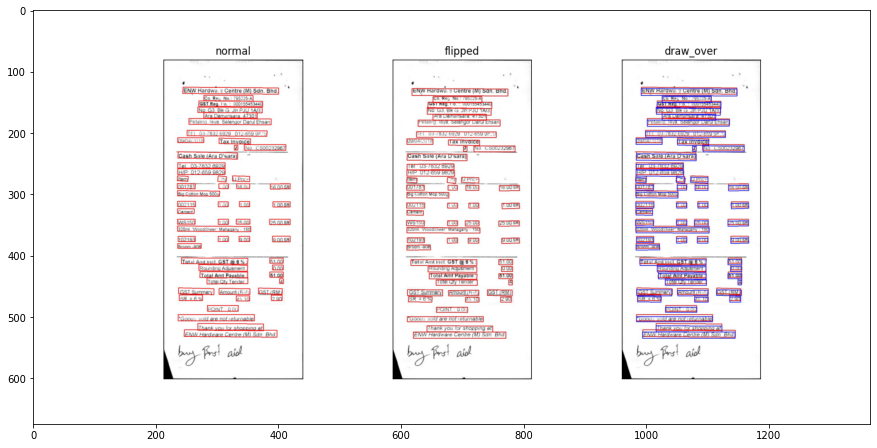

In [ ]:
show_img('33.png', 15, 15)

#### Cải thiện kết quả

Sau khi kiểm tra kết quả predict từ mô hình, tiến hành predict trên tập validation: lật theo chiều Y thì được kết quả như hình. Nhận thấy bouding box bị lệch, tiến hành tăng y_max cho bouding box 5 pixel, kết quả trên tập validation tăng, cũng tương tự tăng trên kết quả tập test.

$\Longrightarrow$ Như vậy, từ base line mô hình pretrained PAN với hmean = 0.376, sau khi train trên dữ liệu SROIE với các giá trị delta_agg, delta_dis khác nhau, thu được kết quả hmean = 0.89, tiếp tục sử dụng mô hình này dự đoán đối với các hình ảnh được crop ra các vùng ROI, cho kết quả tăng lên hmean = 0.917.

$\Longrightarrow$ Tiếp tục kiểm thử kết quả, thấy rõ bouding box bị lệch, nhiều khả năng (random vertical flip không đủ, đặc biệt các chữ cái in hoa xuất hiện nhiều (in hoa thì cỡ chữ như nhau), cũng như các chữ có chân phần dưới xuất hiện ít hơn các chữ có chân phần trên). Lúc này cho y_max += 5 pixel, kết quả hmean = 0.966, ranking = 5.

- `Kết quả F_1 score có thể cải thiện nếu tiếp tục áp dụng lọc các bounding box từ các mô hình mà bounding box đó không xuất hiện trong mô hình tốt nhất, bỏ vào kết quả mô hình tốt nhất`

- `Tuy nhiên, F_1 score cũng có khả năng giảm bởi trong khi recall tăng, precision có khả năng giảm`

### Lọc bounding boxes

- Từ mô hình huấn luyện trên cropped imgs, kết hợp với:
  - Mô hình cho kết quả tốt nhất: 
    - Recall: 96.51%,	Precision: 96.80%, F_1: 96.66%
  - Kết quả sau khi xét các bounding boxes có IoU == 0:
    - Recall: 96.53%,	Precision: 96.07%, F_1: 96.3%

$\Longrightarrow$ Việc kết hợp là không hiệu quả đối với F1_score

$\Longrightarrow$ Tuy nhiên, tùy vào yếu tố quan trọng đối với business thì Recall hay Precision sẽ được chú trọng hơn.

- Bên cạnh đó, kết quả mô hình có khả năng thể cải thiện nếu preprocessing image đủ tốt, kết hợp việc điều chỉnh learning cũng như lr_schedule, tuning các giá trị $\alpha, \beta, \delta_{agg}, \delta_{dis}$, ohem, ...